In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cv2
import math

import time

from scipy.sparse import csr_matrix
import scipy.sparse

import sys
sys.path.insert(0, '../src')

from my_fourrier import *
from helpers import *

In [2]:
times_size_dft = []
times_size_fft = []
sizes_to_test = [5, 7, 9, 11]

for matrix_size in sizes_to_test:
    
    times_dft = []
    times_fft = []
    for i in range(0, 10):
        m = np.random.random((2**matrix_size, 2**matrix_size))

        
        ## -----
        
        start_time = time.time()

        DFT2(m)
        
        end_time = time.time()
        
        times_dft.append(end_time - start_time)
        
        ## ------
        start_time = time.time()

        FFT2(m)
        
        end_time = time.time()
        
        times_fft.append(end_time - start_time)
        
        
    
    times_size_dft.append(times_dft)
    times_size_fft.append(times_fft)
    
    
    

In [3]:
print('done!')

done!


In [4]:
times_size_dft

[[0.012875795364379883,
  0.009898900985717773,
  0.009035110473632812,
  0.009025096893310547,
  0.014856815338134766,
  0.009001970291137695,
  0.008317947387695312,
  0.010951995849609375,
  0.008031129837036133,
  0.008003950119018555],
 [0.461932897567749,
  0.4719269275665283,
  0.43961191177368164,
  0.4615480899810791,
  0.45630574226379395,
  0.4587211608886719,
  0.4541630744934082,
  0.4738121032714844,
  0.5733246803283691,
  0.512822151184082],
 [28.277297973632812,
  30.664658069610596,
  31.528269052505493,
  34.00711917877197,
  33.82915997505188,
  33.79071307182312,
  34.78089499473572,
  45.58188009262085,
  43.498274087905884,
  37.194786071777344],
 [1918.7828888893127,
  1888.825923204422,
  1918.192025899887,
  1885.8840699195862,
  1883.936763048172,
  1912.1962208747864,
  1880.946506023407,
  1894.467707157135,
  1896.6453449726105,
  1920.4664142131805]]

In [17]:
dft_mean = [np.mean(x) for x in times_size_dft]
dft_std = [2 * np.std(x) for x in times_size_dft]

fft_mean = [np.mean(x) for x in times_size_fft]
fft_std = [2 * np.std(x) for x in times_size_fft]

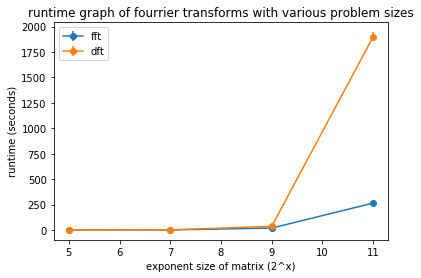

In [27]:
plt.errorbar(sizes_to_test, fft_mean, yerr=fft_std, fmt='-o', label = 'fft')
plt.errorbar(sizes_to_test, dft_mean, yerr=dft_std, fmt='-o', label = 'dft')

plt.xlabel('exponent size of matrix (2^x)')
plt.ylabel('runtime (seconds)')
plt.title('runtime graph of fourrier transforms with various problem sizes')
plt.legend()

plt.show()

In [13]:
print(dft_mean)
print(dft_std)

[0.009999871253967285, 0.47641687393188475, 35.315305256843565, 1900.03438642025]
[0.0043054778202179095, 0.07413962669026926, 10.35238424994732, 29.922563221026092]


In [14]:
print(fft_mean)
print(fft_std)

[0.009464287757873535, 0.4828216075897217, 17.990140771865846, 264.0158390760422]
[0.002638897865703551, 0.07365123378901849, 5.822731126468172, 0.5909479104776425]


In [15]:
np.savetxt('dft_times', times_size_dft)
np.savetxt('fft_times', times_size_fft)

In [28]:
np.savetxt('problem_sizes', sizes_to_test)

In [16]:
np.loadtxt('dft_times')

array([[1.28757954e-02, 9.89890099e-03, 9.03511047e-03, 9.02509689e-03,
        1.48568153e-02, 9.00197029e-03, 8.31794739e-03, 1.09519958e-02,
        8.03112984e-03, 8.00395012e-03],
       [4.61932898e-01, 4.71926928e-01, 4.39611912e-01, 4.61548090e-01,
        4.56305742e-01, 4.58721161e-01, 4.54163074e-01, 4.73812103e-01,
        5.73324680e-01, 5.12822151e-01],
       [2.82772980e+01, 3.06646581e+01, 3.15282691e+01, 3.40071192e+01,
        3.38291600e+01, 3.37907131e+01, 3.47808950e+01, 4.55818801e+01,
        4.34982741e+01, 3.71947861e+01],
       [1.91878289e+03, 1.88882592e+03, 1.91819203e+03, 1.88588407e+03,
        1.88393676e+03, 1.91219622e+03, 1.88094651e+03, 1.89446771e+03,
        1.89664534e+03, 1.92046641e+03]])